# LAB 8 Pancakes With A Problem!

Diego Alejandro Alvarado Chaparro

In [3]:
import pydot
import pandas as pd
from collections import defaultdict 
from IPython.display import Image, display

In [4]:
def lstr(p):
        return ''.join([str(elem)  for elem in p])

## PUNTO 1

In [79]:
def Graph_Network(n):

        s = [i for i in range(1,n+1)]

        # Create dictionaries graph,visited and pydot graph G
        graph = defaultdict()
        visited = defaultdict()
        edges = defaultdict()
        G = pydot.Dot(graph_type="digraph")
        
        # Create a queue for BFS 
        queue = [] 
  
        # Mark the source node as visited and enqueue it 
        queue.append([s,0]) 
        visited[lstr(s)] = True

        L = 0
  
        while queue: 
  
            # Dequeue a vertex from queue 
            e = queue.pop(0) 
            s = e[0]
            l = e[1]
            graph[lstr(s)]=[]
            node = pydot.Node(lstr(s))
            G.add_node(node)
            
            # Get all adjacent vertices of the 
            # dequeued vertex s. If a adjacent 
            # has not been visited, then mark it 
            # visited and enqueue it 
            #if(s != sorted(s)):
            for i in range(len(s)-1):
              d = s[i+1::-1] + s[i+2:] 
              if (d != s):                   
                if not(lstr(d) in visited.keys()):
                  if L < l+1:
                    L = l+1
                  queue.append([d, l+1])
                node = pydot.Node(lstr(d))
                G.add_node(node)
                if (lstr(d)+lstr(s) not in edges.keys()):
                  edge = pydot.Edge(lstr(s),lstr(d))
                  G.add_edge(edge)
                  edges[lstr(s)+lstr(d)] = True
                graph[lstr(s)].append(lstr(d))
                visited[lstr(d)] = True 
        print("Pn:",L)
                  
                
        # Dsplay the pydot graph G
        im = Image(G.create_png())
        display(im)

### n = 1

Pn: 0


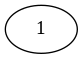

In [80]:
Graph_Network(1)

### n = 2

Pn: 1


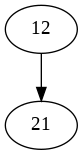

In [81]:
Graph_Network(2)

### n = 3

Pn: 3


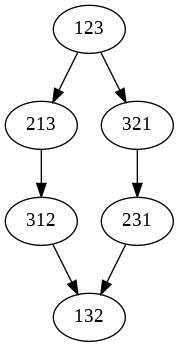

In [82]:
Graph_Network(3)

### n = 4

Pn: 4


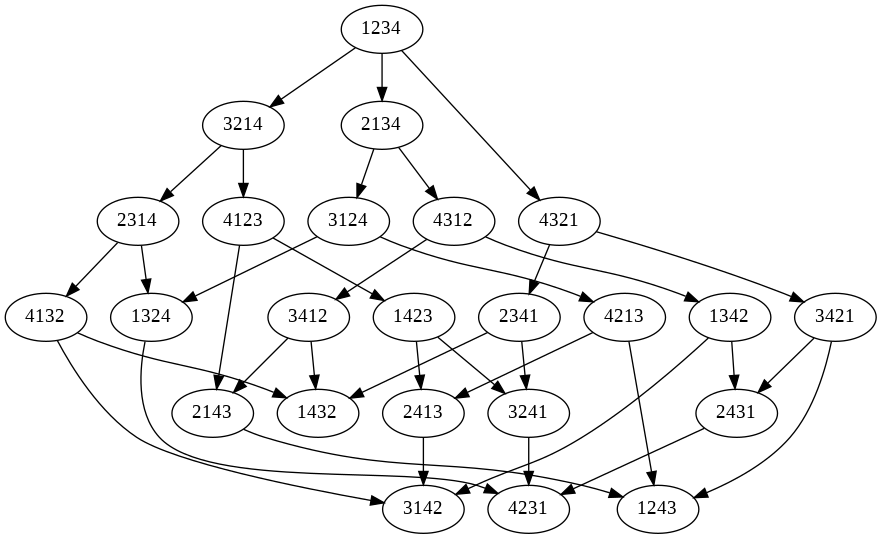

In [83]:
Graph_Network(4)

## PUNTO 2

In [38]:
from google.colab import drive
drive.flush_and_unmount()

In [47]:
def get_best(s):
        visited = defaultdict()
        # Create a queue for BFS 
        queue = [] 
  
        # Mark the source node as visited and enqueue it 
        queue.append([s,0]) 
        visited[lstr(s)] = True
  
        while queue: 
  
            # Dequeue a vertex from queue 
            e = queue.pop(0)
            s = e[0]
            l = e[1] 
            
            if(s != sorted(s)):
              for i in range(len(s)-1):
                d = s[i+1::-1] + s[i+2:]  
                if (d != s) and not(lstr(d) in visited.keys()):
                  if(d == sorted(d)):
                    return l+1
                  queue.append([d,l+1]) 
                  visited[lstr(d)] = True 
            else:
              return 0


def get_Pn_rec(n, lis, cadena, size, results, file):
  for i in range(n-size):
    get_Pn_rec(n, [e for e in lis if e != lis[i]], cadena+lis[i], size + 1, results, file)
  if size == n:
    b = get_best(list(cadena))
    # Write to a file the value of b
    file.write(cadena + " necesita " + str(b) + "\n")
    if results[0] < b:
      results.pop()
      results.pop()
      results.append(b)
      results.append(cadena)


def get_Pn(n):
  file = open(str(n)+"_pns.txt", "w+")
  lis = [str(e) for e in range(1,n+1)]
  res = [0, ""]
  get_Pn_rec(n, lis, "", 0, res, file)
  file.write("Para n = " + str(n) + " el Pn es: " + str(res[0]) + " con la pila inicial " + res[1])
  file.close
  file_name = str(n)+"_pns.txt"


In [19]:
%%time
# Codigo para dejar correr 8 horas
i = 5
while(True):
  get_Pn(i)
  i = i+1

KeyboardInterrupt: ignored

Despues de 8 horas se logró ejecutar desde n = 5 hasta n = 8.

Cada prueba de cada permutación se guardaron en archivos .txt que estan en la misma carpeta donde esta este .ipynb

In [37]:
n5 = pd.read_csv('5_pns.txt', sep="\n", header=None);
n6 = pd.read_csv('6_pns.txt', sep="\n", header=None);
n7 = pd.read_csv('7_pns.txt', sep="\n", header=None);
n8 = pd.read_csv('8_pns.txt', sep="\n", header=None);

### n = 5

In [36]:
print(n5.tail);

<bound method NDFrame.tail of                                                     0
0                                    12345 necesita 0
1                                    12354 necesita 3
2                                    12435 necesita 3
3                                    12453 necesita 4
4                                    12534 necesita 4
..                                                ...
116                                  54213 necesita 3
117                                  54231 necesita 4
118                                  54312 necesita 2
119                                  54321 necesita 1
120  Para n = 5 el Pn es: 5 con la pila inicial 13254

[121 rows x 1 columns]>


### n = 6

In [29]:
print(n6.tail);

<bound method NDFrame.tail of                                                      0
0                                    123456 necesita 0
1                                    123465 necesita 3
2                                    123546 necesita 3
3                                    123564 necesita 4
4                                    123645 necesita 4
..                                                 ...
716                                  654213 necesita 3
717                                  654231 necesita 4
718                                  654312 necesita 2
719                                  654321 necesita 1
720  Para n = 6 el Pn es: 7 con la pila inicial 462513

[721 rows x 1 columns]>


### n = 7

In [30]:
print(n7.tail);

<bound method NDFrame.tail of                                                       0
0                                    1234567 necesita 0
1                                    1234576 necesita 3
2                                    1234657 necesita 3
3                                    1234675 necesita 4
4                                    1234756 necesita 4
...                                                 ...
5036                                 7654213 necesita 3
5037                                 7654231 necesita 4
5038                                 7654312 necesita 2
5039                                 7654321 necesita 1
5040  Para n = 7 el Pn es: 8 con la pila inicial 137...

[5041 rows x 1 columns]>


### n = 8

In [31]:
print(n8.tail);

<bound method NDFrame.tail of                                                        0
0                                    12345678 necesita 0
1                                    12345687 necesita 3
2                                    12345768 necesita 3
3                                    12345786 necesita 4
4                                    12345867 necesita 4
...                                                  ...
40316                                87654213 necesita 3
40317                                87654231 necesita 4
40318                                87654312 necesita 2
40319                                87654321 necesita 1
40320  Para n = 8 el Pn es: 9 con la pila inicial 132...

[40321 rows x 1 columns]>


## PUNTO 3

In [88]:
def Pancake_Trees_Two_Spatulas(s,L):  

        # Create dictionaries graph,visited and pydot graph G
        graph = defaultdict()
        visited = defaultdict()
        G = pydot.Dot(graph_type="digraph")
        
        # Create a queue for BFS 
        queue = [] 
  
        # Mark the source node as visited and enqueue it 
        queue.append([s,0]) 
        visited[lstr(s)] = True
  
        while queue: 
  
            # Dequeue a vertex from queue 
            e = queue.pop(0)
            s = e[0]
            l = e[1] 
            graph[lstr(s)]=[]

            flag = False
            for i in range(len(s)-1):
                d = s[i+1::-1] + s[i+2:]
                if(d == sorted(d)):
                     flag = True
            if flag:
              node = pydot.Node(lstr(s),style="filled", fillcolor="yellow")
            else: 
              node = pydot.Node(lstr(s))

            G.add_node(node)
            
            # Get all adjacent vertices of the 
            # dequeued vertex s. If a adjacent 
            # has not been visited, then mark it 
            # visited and enqueue it 
            if(s != sorted(s)) and (l < L):
              for i in range(len(s)-1):
                for j in range(i+1, len(s)):
                  if i == 0:
                    d = s[j::-1] + s[j+1:]
                  else:
                    d = s[:i] + s[j:i-1:-1] + s[j+1:]
                  if (d != s) and not(lstr(d) in visited.keys()):
                  
                    if(d != sorted(d)):
                      node = pydot.Node(lstr(d))
                    else:
                      node = pydot.Node(lstr(d),style="filled", fillcolor="green") # first sorted green
                    
                    G.add_node(node)
                    edge = pydot.Edge(lstr(s),lstr(d))
                    G.add_edge(edge)
                    graph[lstr(s)].append(lstr(d))
                    queue.append([d,l+1]) 
                    visited[lstr(d)] = True 
              
        # Dsplay the pydot graph G
        im = Image(G.create_png())
        display(im)

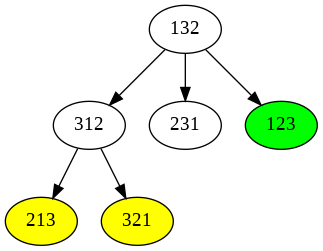

In [91]:
Pancake_Trees_Two_Spatulas([1,3,2],5)

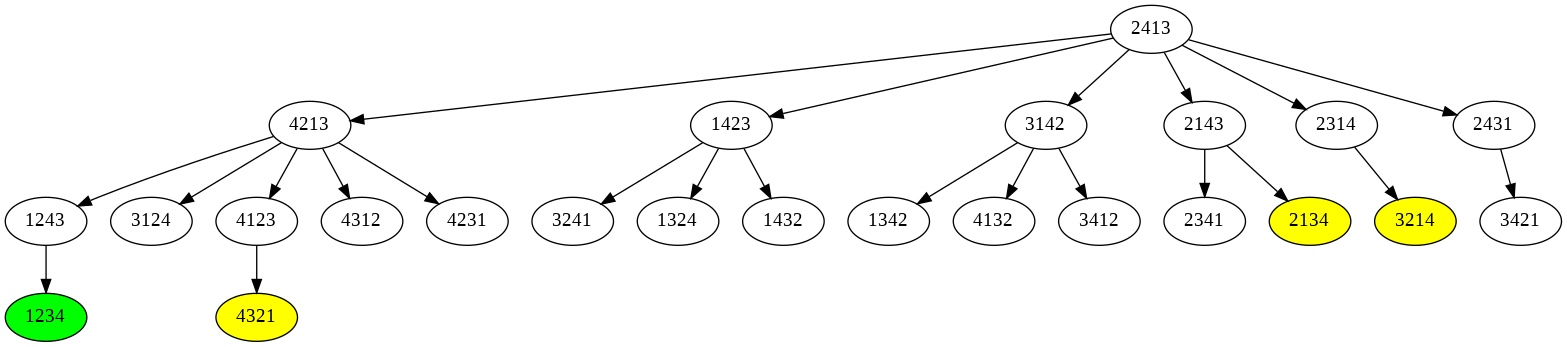

In [90]:
Pancake_Trees_Two_Spatulas([2,4,1,3], 5)